In [32]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import plotly.express as px
from segmentflow import segment, view
from skimage import color, segmentation
from stl import mesh
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading images...
--> Images loaded as 3D array:  (100, 650, 650)
Plotting images: [0, 25, 50, 75]


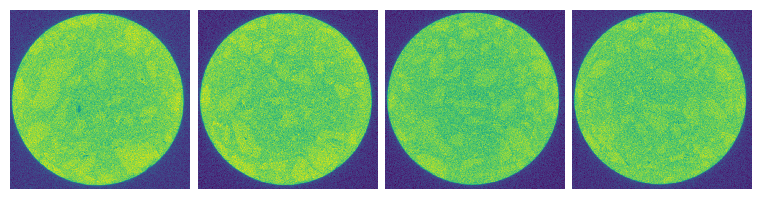

In [19]:
img_dir_path = Path('../data/2mm_IDOX_Estane_A/160kV_10W_HE6/raw')
# row & col crop deterined in NB 09
imgs = segment.load_images(
    img_dir_path,
    slice_crop=[100, 200],
    row_crop=[175, 825],
    col_crop=[175, 825],
    # convert_to_float=True,
    file_suffix='.tiff'
)
fig, axes = view.plot_slices(
    imgs,
    nslices=4,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

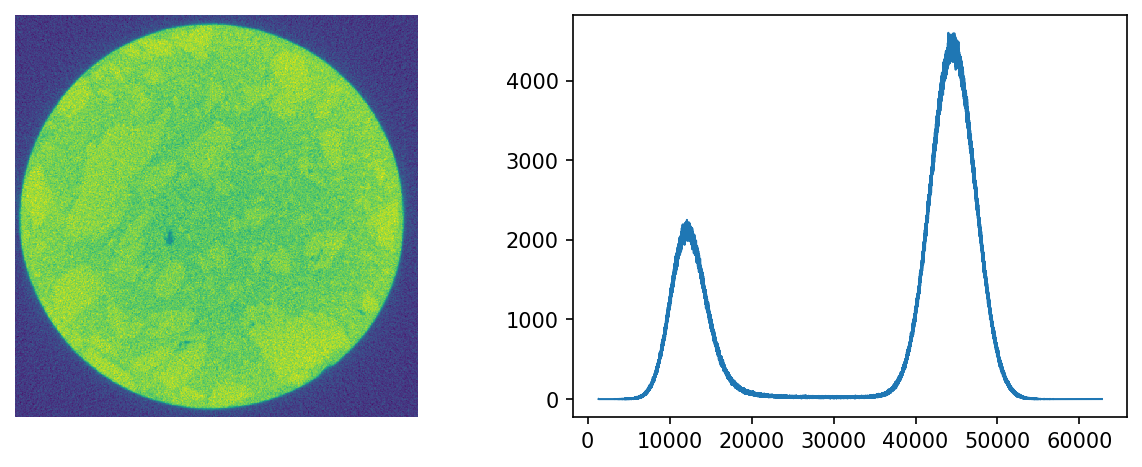

In [21]:
fig, ax = view.plot_hist(imgs, view_slice_i=0)

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Plotting images: [0, 33, 66]


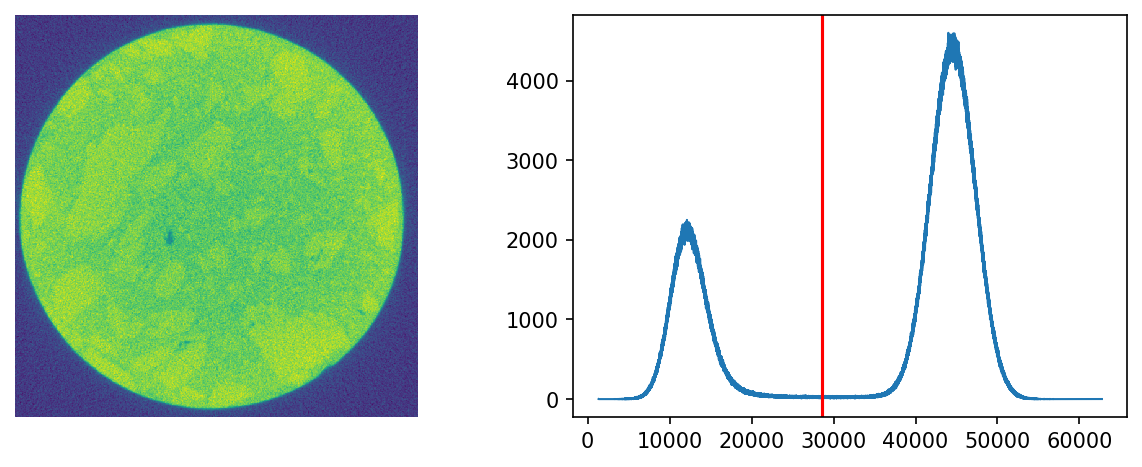

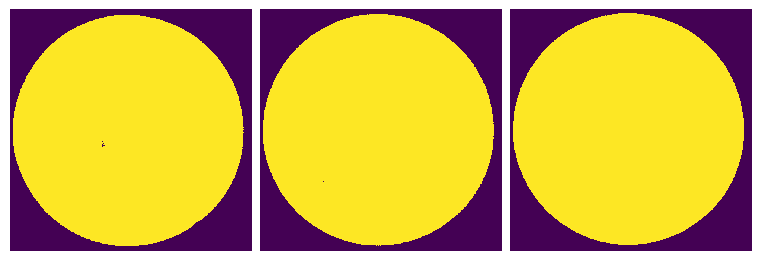

In [63]:
imgs_bw, thresh_vals = segment.binarize_multiotsu(imgs)
fig, ax = view.plot_hist(imgs, view_slice_i=0)
for x in thresh_vals:
    ax[1].axvline(x, c='red')
fig, ax = view.plot_slices(imgs_bw)

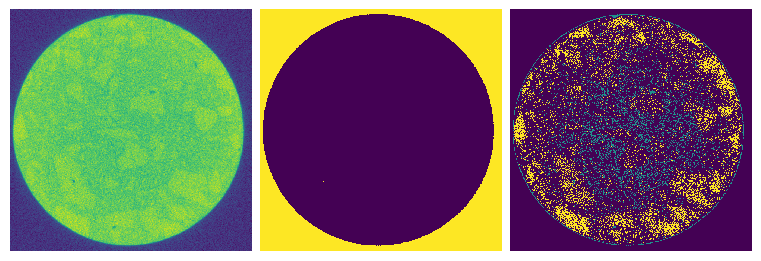

In [61]:
img = imgs[33, ...]
plo = thresh_vals[0]
pmid = np.percentile(img, 35)
phi = np.percentile(img, 90)
img_markers = np.zeros(img.shape, dtype=np.ubyte)
# img_markers[img < plo] = 0
img_markers[(img > plo) & (img < pmid)] = 1
img_markers[img > phi] = 2
fig, ax = view.plot_images(
    [img, img < plo, img_markers]
)

Probably need radial preprocessing

c:\Users\cgusb\Python\envs\segmentflow-env\lib\site-packages\skimage\_shared\utils.py:348: UserWarning:

The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.



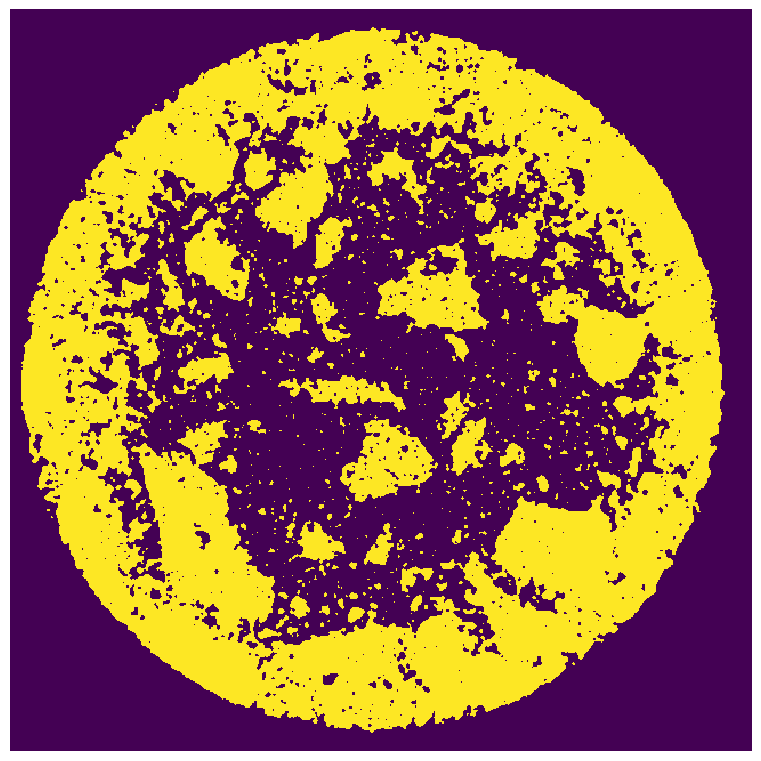

In [62]:
img_rand = segmentation.random_walker(img, img_markers, beta=130, tol=0.001)
fig, ax = view.plot_images([img_rand])